In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

## make a HELLO

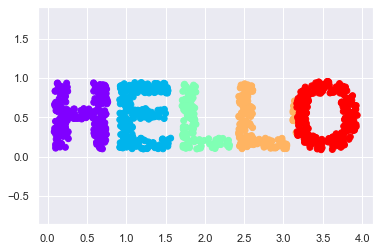

In [3]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

# Multidimensional Scaling (MDS)¶

MDS takes a distance matrix as the input and transform the distances back into x and y coordinates.

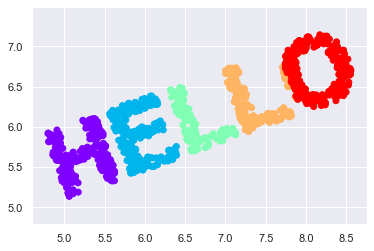

In [12]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

## compute pairwise distance

In [13]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

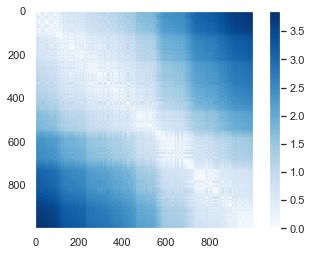

In [14]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

## apply MDS model to learn the coordinate

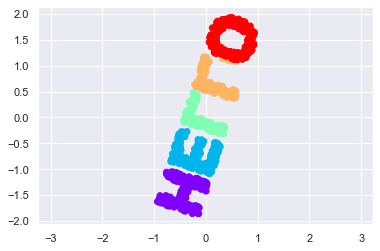

In [15]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [16]:
dimension=3

## transform into 3D

In [18]:
rng = np.random.RandomState(42)
C = rng.randn(dimension, dimension)
e, V = np.linalg.eigh(np.dot(C, C.T))

In [20]:
V[:2]

array([[-0.63360361,  0.75939282,  0.14788172],
       [ 0.64803399,  0.41652241,  0.63762139]])

In [22]:
X3 = X@V[:2]

In [23]:
X3.shape

(1000, 3)

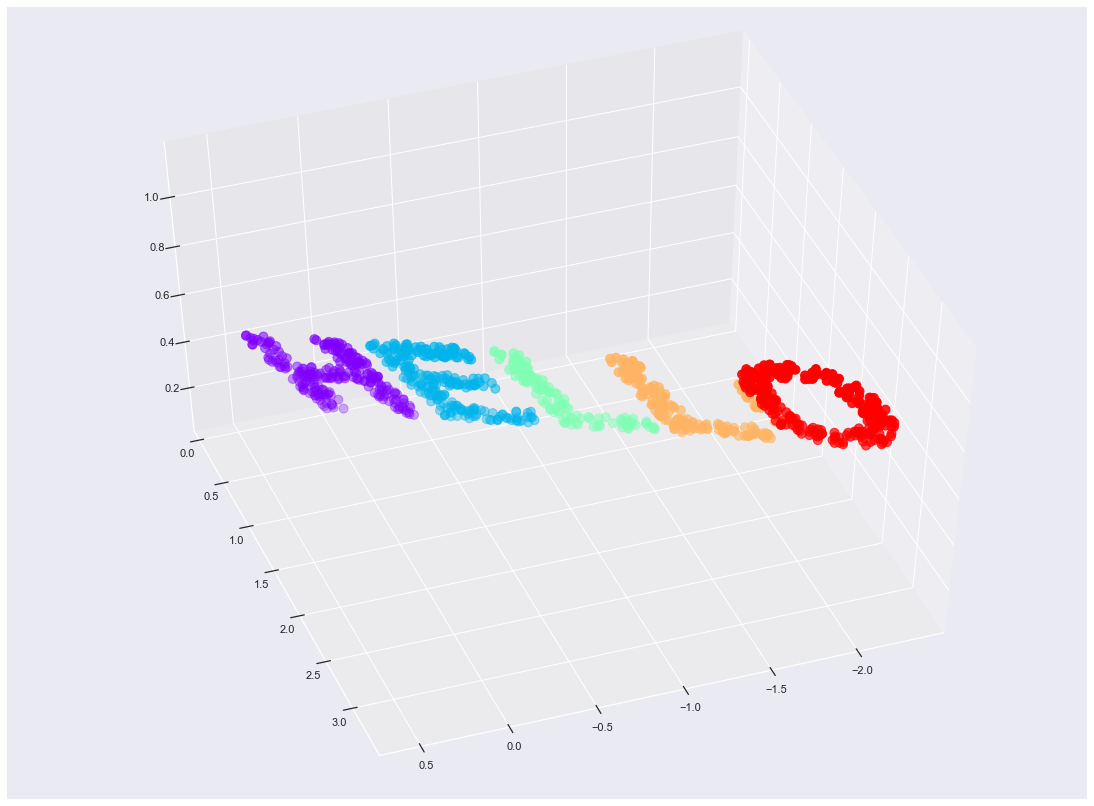

In [35]:
from mpl_toolkits import mplot3d
fig, ax = plt.subplots(figsize=(15, 11))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize, s = 80)
ax.view_init(azim=70, elev=50)
fig.savefig('hello3D.png')

## MDS (Multidimensional Scaling) in 2D

In [36]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)

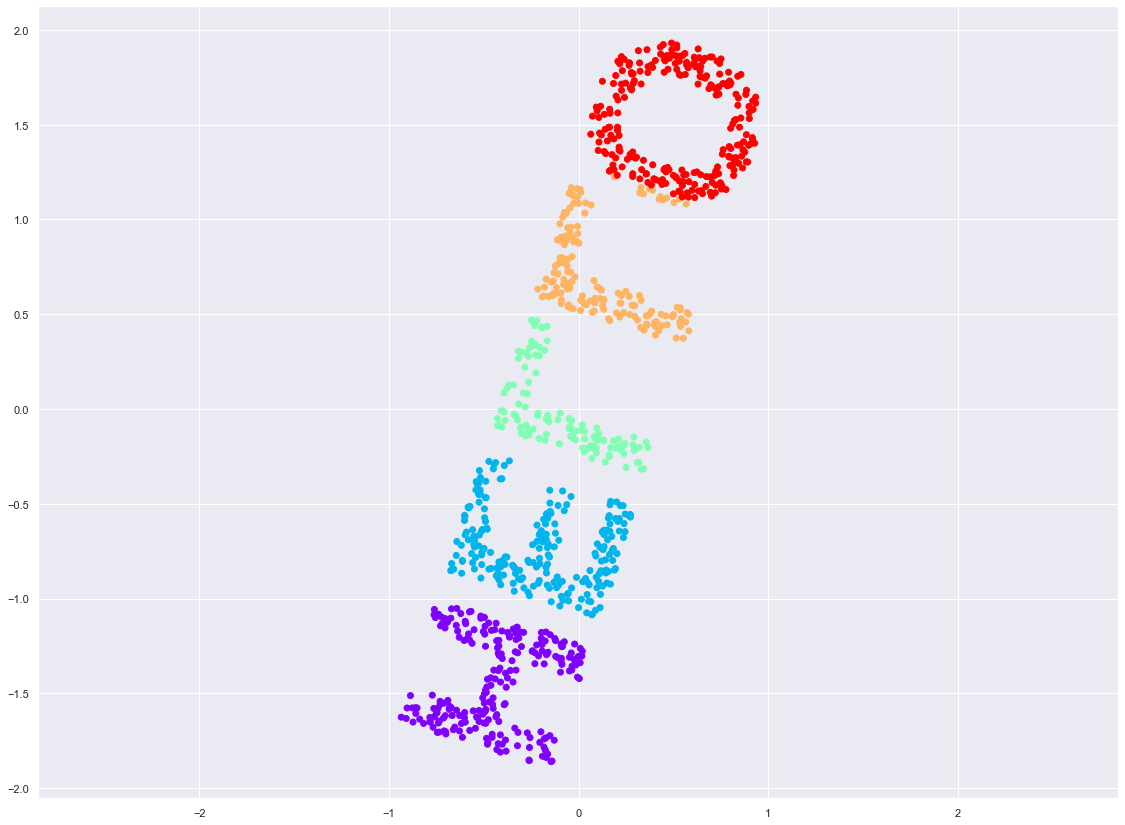

In [37]:
fig, ax = plt.subplots(figsize=(15, 11))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');
fig.savefig('hello2D.png')

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);
